In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM5 import SCM5

  0%|          | 0/2 [00:00<?, ?it/s]

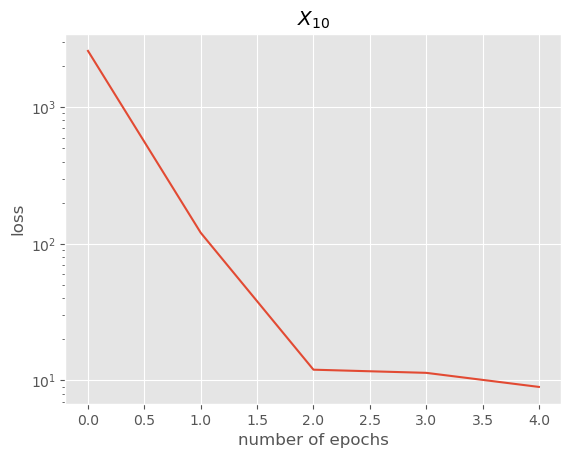

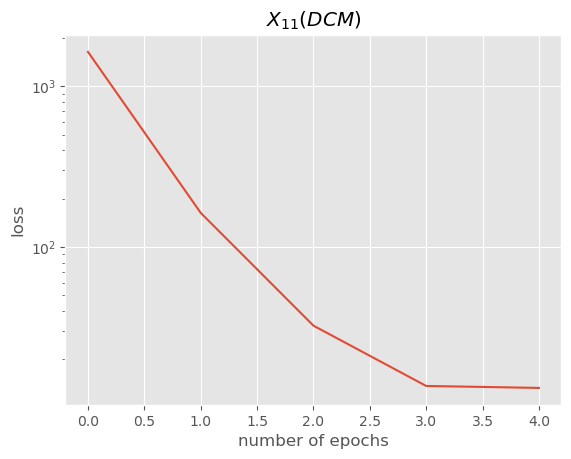

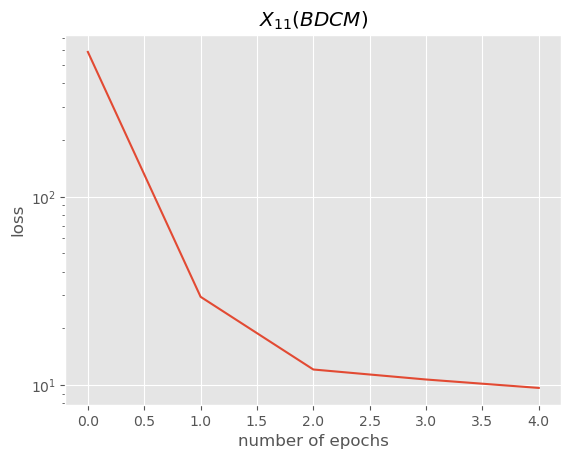

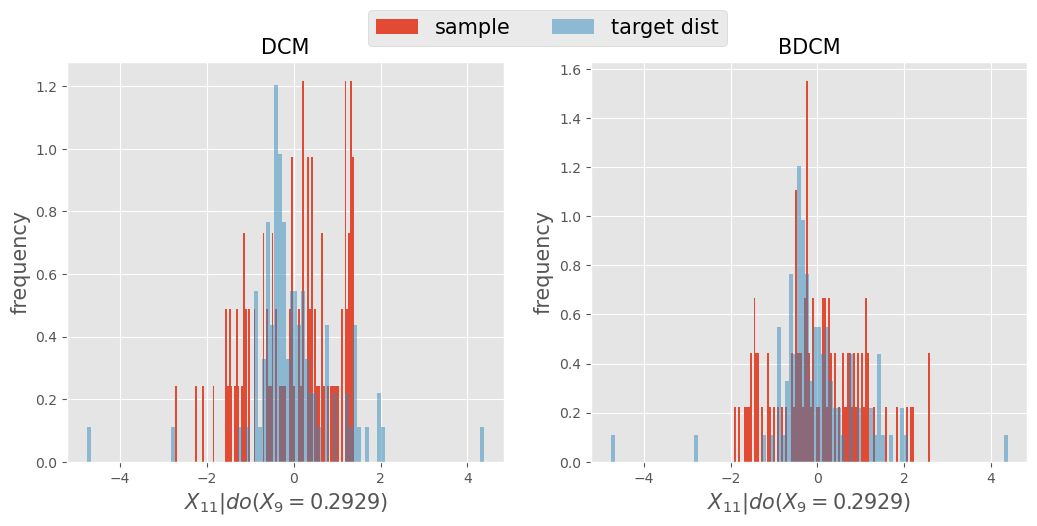

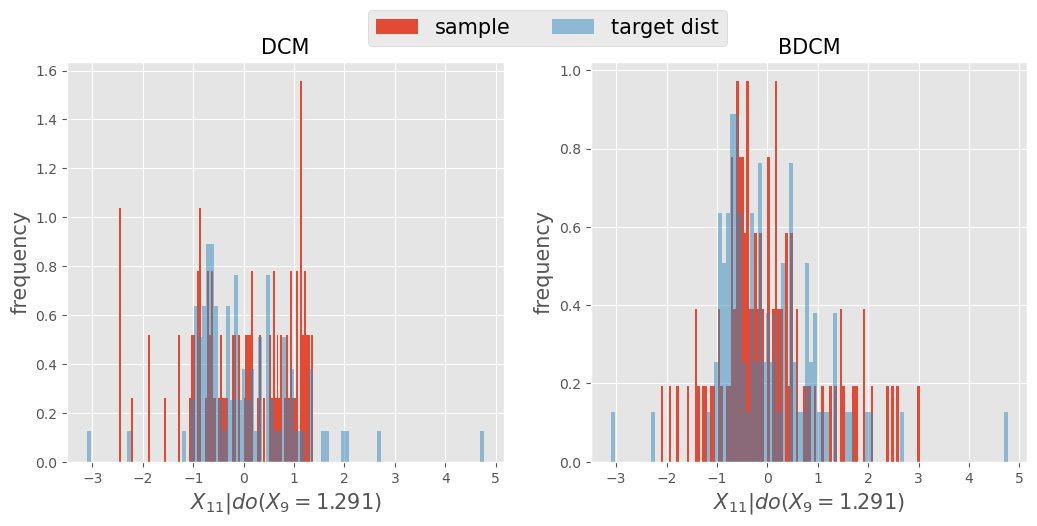

 50%|█████     | 1/2 [00:05<00:05,  5.31s/it]

mean of MMD for DCM: 0.000804
standard deviation of MMD for DCM: 0.000172
mean of MMD for BDCM: 0.000262
standard deviation of MMD for BDCM: 0.000156


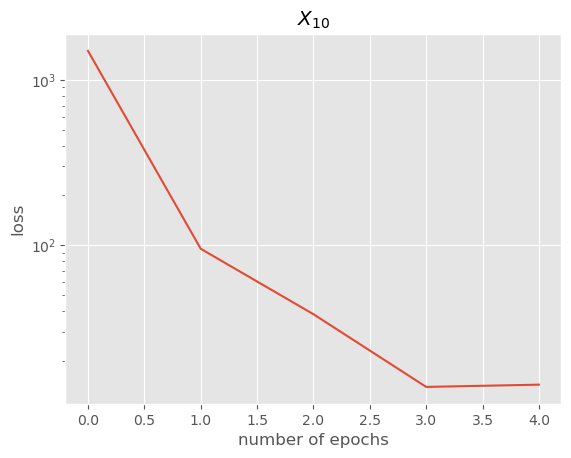

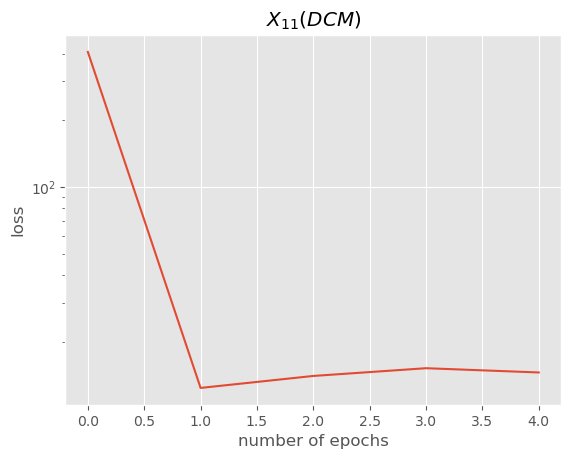

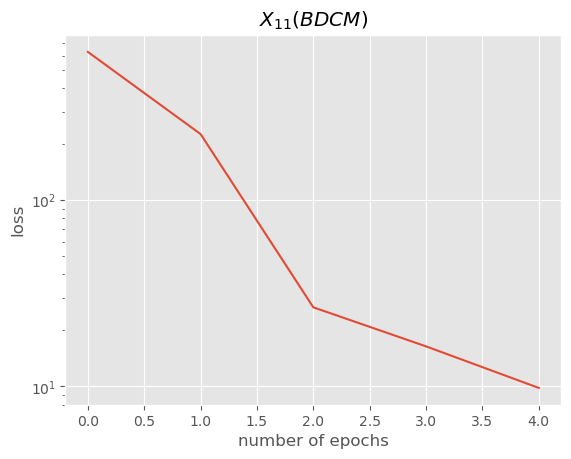

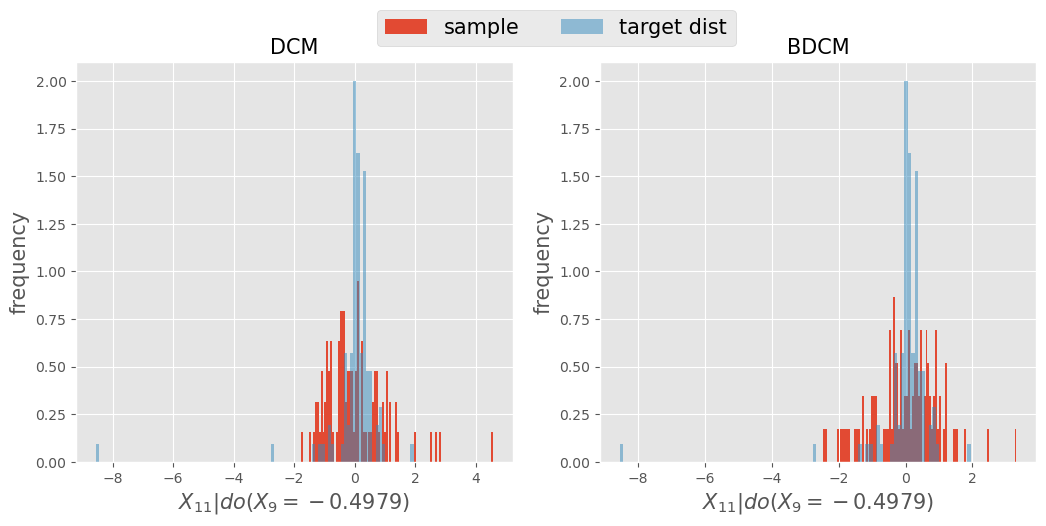

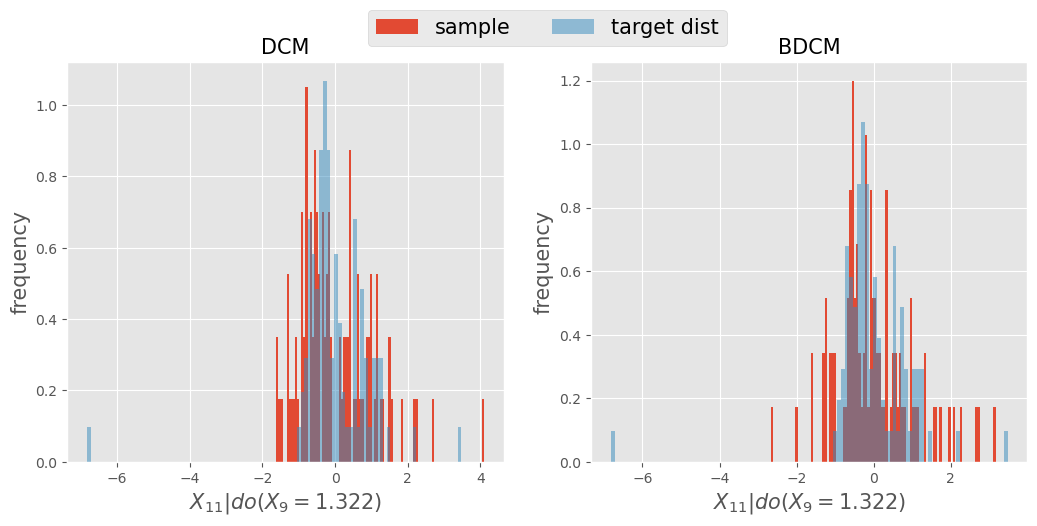

100%|██████████| 2/2 [00:10<00:00,  5.19s/it]

mean of MMD for DCM: 0.00458
standard deviation of MMD for DCM: 0.00246
mean of MMD for BDCM: 0.00367
standard deviation of MMD for BDCM: 0.00177
mean of all MMD for DCM: 0.00269
standard deviation of all MMD for DCM: 0.00257
mean of all MMD for BDCM: 0.00197
standard deviation of all MMD for BDCM: 0.00212


In [2]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = x[0] * (u + 0.1)
  elif ind == 2:
    output = -(np.sqrt(abs(x[1]) * (abs(u) + 0.1))) / 2 + abs(x[1]) + u / 5
  elif ind == 3:
    output = x[1] + (u + 0.1) / 2 * x[1]
  elif ind == 4:
    output = -1 / (1 + (abs(u) + 0.1) * np.exp(-x[0]))
  elif ind == 5:
    output = (u * (abs(x[4]) + 0.3)) / 5 + u
  elif ind == 6:
    output =x[5] * u + abs(x[5] + 0.01) * abs(u)
  elif ind == 7:
    output = 3 * x[5] + 0.1 + u
  elif ind == 8:
    output = x[0] ** 3 * x[4] + x[0] - x[4] + u
  elif ind == 9:
    output = x[8] * u + (u + 0.1) ** 2
  elif ind == 10:
    output = x[2]  * (x[7] - 0.1) + x[8] * x[9] + x[2] * x[8] - x[6] * x[9] + x[2] * x[7] - x[3] * x[8] + x[8] * x[9]
  return normalize(output)

SCM5(structural_eq=structural_eq, simple_or_complex = "complex")